In [1]:
import sys
import asyncio
import logging
import numpy as np
import matplotlib.pyplot as plt
from lsst.ts.externalscripts.auxtel.latiss_cwfs_align import LatissCWFSAlign
import time

Could not import Simbad. slew_object will not work. Install it with pip install astroquery.


In [2]:
script = LatissCWFSAlign(index=1, remotes=False)
#await asyncio.gather(script.start_task, script.attcs.start_task, script.latiss.start_task)

In [7]:
script.angle = 0.
script.intra_visit_id = 2020021800179 #2020012800333
script.extra_visit_id = 2020021800180 #2020012800334

In [8]:
stream_handler = logging.StreamHandler(sys.stdout)
# if you want logging
logger = logging.getLogger()
logger.addHandler(stream_handler)
logger.level = logging.DEBUG

In [9]:
start_time=time.time()
await script.run_cwfs()
end_time=time.time()
print('WFE fitting took {0:0.3f} seconds'.format(end_time-start_time)) # 56.7s

Running cwfs in 2020021800179/2020021800180.
Running cwfs in 2020021800179/2020021800180.


/home/saluser/repos/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:310: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200218_000179.yaml
Checking for header correction file named LATISS-AT_O_20200218_000179.yaml
AT_O_20200218_000179: Forcing detector serial to ITL-3800C-068
AT_O_20200218_000179: Forcing detector serial to ITL-3800C-068
AT_O_20200218_000179: Forcing SHUTTIME header to be None
AT_O_20200218_000179: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200218_000179.yaml
Checking for header correction file named LATISS-AT_O_20200218_000179.yaml
AT_O_20200218_000179: Forcing detector serial to ITL-3800C-068
AT_O_20200218_000179: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
Using translation class LSST_LATISS
AT_O_20200218_000179: Dark time less than exposure time. Setting dark time to the exposure time.
AT_O_20200218_000179:

/home/saluser/repos/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:310: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200218_000180.yaml
Checking for header correction file named LATISS-AT_O_20200218_000180.yaml
AT_O_20200218_000180: Forcing detector serial to ITL-3800C-068
AT_O_20200218_000180: Forcing detector serial to ITL-3800C-068
AT_O_20200218_000180: Forcing SHUTTIME header to be None
AT_O_20200218_000180: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200218_000180.yaml
Checking for header correction file named LATISS-AT_O_20200218_000180.yaml
AT_O_20200218_000180: Forcing detector serial to ITL-3800C-068
AT_O_20200218_000180: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
Using translation class LSST_LATISS
AT_O_20200218_000180: Dark time less than exposure time. Setting dark time to the exposure time.
AT_O_20200218_000180:

Measured zernike coeficients: [69.65839429713489, 44.94349981346548, 367.26463241528364]
De-rotated zernike coeficients: [ 44.94349981 -69.6583943  367.26463242]
Hexapod offset: [-0.34308015 -0.53174347 -0.08744396]
Telescope offsets: [-20.58480907 -31.90460808   0.        ]

Measured zernike coeficients: [69.65839429713489, 44.94349981346548, 367.26463241528364]
De-rotated zernike coeficients: [ 44.94349981 -69.6583943  367.26463242]
Hexapod offset: [-0.34308015 -0.53174347 -0.08744396]
Telescope offsets: [-20.58480907 -31.90460808   0.        ]

[ 367.26463242   53.08021457   61.01278191   69.6583943    44.94349981
   27.86721295   53.23571151 -173.14097234  -74.49421088]
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


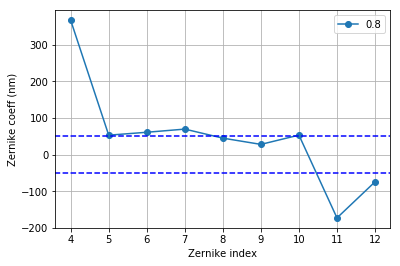

In [10]:
# print results
script.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, script.algo.zer4UpNm[:9], 'o-', label=f'{script.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()

print(script.algo.zer4UpNm[:9])

update_title_pos
update_title_pos
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/opt/lsst/software/stack/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/opt/lsst/software/stack/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


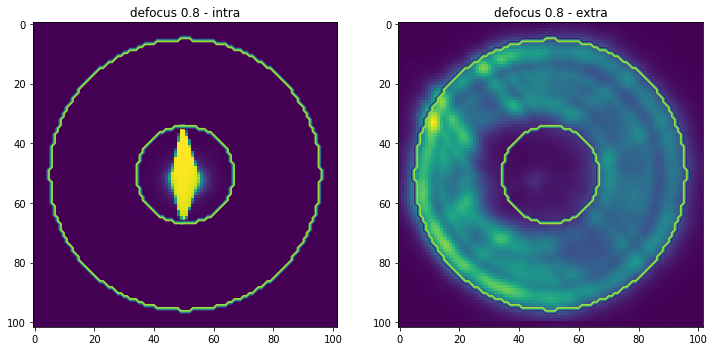

In [11]:
# plot image and mask
fig1 = plt.figure(1, figsize=(12,8))
ax11 = fig1.add_subplot(121)
ax11.set_title("defocus 0.8 - intra")
ax11.imshow(script.I1[0].image0)
ax11.contour(script.algo.pMask) 
ax12 = fig1.add_subplot(122)
ax12.set_title("defocus 0.8 - extra")
ax12.imshow(script.I2[0].image0)
ax12.contour(script.algo.pMask) 

In [7]:
import copy
A=copy.deepcopy(script.I2[0].image0)
A.shape

(204, 204)

In [8]:
from astropy.convolution import convolve, Tophat2DKernel
tophat_kernel = Tophat2DKernel(1)
A1 = convolve(A, tophat_kernel)

update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


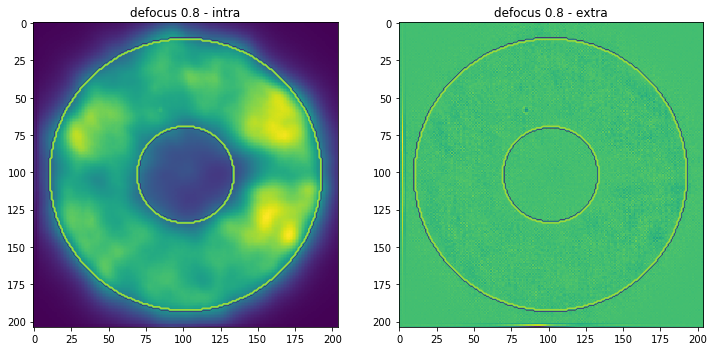

In [9]:
# plot image and mask
fig1 = plt.figure(1, figsize=(12,8))
ax11 = fig1.add_subplot(121)
ax11.set_title("defocus 0.8 - intra")
ax11.imshow(A)
ax11.contour(script.algo.pMask) 
ax12 = fig1.add_subplot(122)
ax12.set_title("defocus 0.8 - extra")
ax12.imshow(A1-A)
ax12.contour(script.algo.pMask) 

In [10]:
tophat_kernel.array

array([[0.        , 0.31830989, 0.        ],
       [0.31830989, 0.31830989, 0.31830989],
       [0.        , 0.31830989, 0.        ]])